Epoch 1/1000
4/4 - 1s - loss: 0.3511 - mean_squared_error: 0.3511 - val_loss: 0.3422 - val_mean_squared_error: 0.3422
Epoch 2/1000
4/4 - 0s - loss: 0.3434 - mean_squared_error: 0.3434 - val_loss: 0.3358 - val_mean_squared_error: 0.3358
Epoch 3/1000
4/4 - 0s - loss: 0.3345 - mean_squared_error: 0.3345 - val_loss: 0.3302 - val_mean_squared_error: 0.3302
Epoch 4/1000
4/4 - 0s - loss: 0.3277 - mean_squared_error: 0.3277 - val_loss: 0.3248 - val_mean_squared_error: 0.3248
Epoch 5/1000
4/4 - 0s - loss: 0.3217 - mean_squared_error: 0.3217 - val_loss: 0.3204 - val_mean_squared_error: 0.3204
Epoch 6/1000
4/4 - 0s - loss: 0.3171 - mean_squared_error: 0.3171 - val_loss: 0.3165 - val_mean_squared_error: 0.3165
Epoch 7/1000
4/4 - 0s - loss: 0.3124 - mean_squared_error: 0.3124 - val_loss: 0.3130 - val_mean_squared_error: 0.3130
Epoch 8/1000
4/4 - 0s - loss: 0.3083 - mean_squared_error: 0.3083 - val_loss: 0.3104 - val_mean_squared_error: 0.3104
Epoch 9/1000
4/4 - 0s - loss: 0.3045 - mean_squared_erro

Epoch 5/1000
4/4 - 0s - loss: 0.2454 - mean_squared_error: 0.2454 - val_loss: 0.2808 - val_mean_squared_error: 0.2808
Epoch 6/1000
4/4 - 0s - loss: 0.2421 - mean_squared_error: 0.2421 - val_loss: 0.2688 - val_mean_squared_error: 0.2688
Epoch 7/1000
4/4 - 0s - loss: 0.2382 - mean_squared_error: 0.2382 - val_loss: 0.2578 - val_mean_squared_error: 0.2578
Epoch 8/1000
4/4 - 0s - loss: 0.2371 - mean_squared_error: 0.2371 - val_loss: 0.2581 - val_mean_squared_error: 0.2581
Epoch 9/1000
4/4 - 0s - loss: 0.2372 - mean_squared_error: 0.2372 - val_loss: 0.2650 - val_mean_squared_error: 0.2650
Epoch 10/1000
4/4 - 0s - loss: 0.2372 - mean_squared_error: 0.2372 - val_loss: 0.2624 - val_mean_squared_error: 0.2624
Epoch 11/1000
4/4 - 0s - loss: 0.2377 - mean_squared_error: 0.2377 - val_loss: 0.2655 - val_mean_squared_error: 0.2655
Epoch 12/1000
4/4 - 0s - loss: 0.2377 - mean_squared_error: 0.2377 - val_loss: 0.2657 - val_mean_squared_error: 0.2657
Restoring model weights from the end of the best epoc

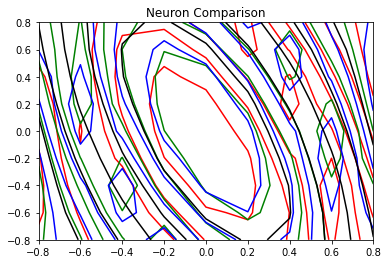

In [1]:
import tensorflow as tf
from tensorflow.keras import *
from tensorflow.keras.layers import Activation, Dense
import numpy as np
import random
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt

start=-1
step=(2/9)
num=10

train_x = np.arange(0,num)*step+start
train_y = train_x
test_x = np.arange(0,9)*step+(-1+(1/9))
test_y = test_x
scaler = MinMaxScaler(feature_range=(-1,1))
tmp_data = np.random.rand(1,50)
tmp_x = np.transpose(tmp_data)
scaler.fit(tmp_x)
val_x = np.transpose(scaler.transform(tmp_x))
val_y = val_x
[train_X, train_Y] = np.meshgrid(train_x, train_y)
[test_X, test_Y] = np.meshgrid(test_x, test_y);
[val_X, val_Y] = np.meshgrid(val_x, val_y);
train_Z = np.cos(train_X + 6*0.35*train_Y) + 2.0*0.35*train_X*train_Y
test_Z = np.cos(test_X + 6*0.35*test_Y) + 2.0*0.35*test_X*test_Y
val_Z = np.cos(val_X + 6*0.35*val_Y) + 2.0*0.35*val_X*val_Y
trainx = train_X.flatten()
trainy = train_Y.flatten()
trainData = [trainy, trainx]
trainData = np.array(trainData)
testx = test_X.flatten()
testy = test_Y.flatten()
testData = [testy, testx]
testData = np.array(testData)
trainLabel = np.array(train_Z.flatten())
testLabel = np.array(test_Z.flatten())
valx = val_X.flatten()
valy = val_Y.flatten()
valData = [valy, valx]
valData = np.array(valData)
valLabel = np.array(val_Z.flatten())
trainData = np.transpose(trainData)
trainLabel = np.transpose(trainLabel)
testData = np.transpose(testData)
testLabel = np.transpose(testLabel)
valData = np.transpose(valData)
valLabel = np.transpose(valLabel)
trainLabel = np.reshape(trainLabel, (100, 1))
testLabel = np.reshape(testLabel, (81, 1))
valLabel = np.reshape(valLabel, (2500, 1))
nodeNum = [2, 8, 50]
testingDim = 9
colours = ['r', 'g', 'b']
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
fig, ax = plt.subplots()
for iter in range (0, 3):
  model = Sequential()
  model.add(Dense(nodeNum[iter], activation='sigmoid'))
  model.add(Dense(2))
  model.compile(
    optimizer='sgd',
    loss='mse',
    metrics=[tf.keras.metrics.MeanSquaredError()])
  monitor = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, 
        patience=5, verbose=1, mode='auto',
        restore_best_weights=True)
  model.fit(trainData, trainLabel, validation_data=(valData, valLabel),
        callbacks=[monitor], verbose=2,epochs=1000)
  pred = model.predict(testData)
  score = np.sqrt(metrics.mean_squared_error(pred, testLabel)).reshape(testingDim, testingDim)
  
  X = []
  Y = []
  for i in range(0, testingDim+2):
    toAddX = []
    toAddY = []
    for j in range(0, testingDim+2):
      if(j > 0 and j < 10 and i > 0 and i < 10):
        toAddY.append((j*(2/10)-1))
        toAddX.append((i*(2/10)-1))
    if(len(toAddX) > 0): X.append(toAddX)
    if(len(toAddY) > 0): Y.append(toAddY)

  X = np.array(X)
  Y = np.array(Y)
  Z = np.array(testLabel).reshape(testingDim, testingDim)

  CS = ax.contour(X, Y, score, 6, colors=colours[iter])
  if(iter == 2): CS = ax.contour(X, Y, Z, 6, colors='k')



ax.set_title('Neuron Comparison')
plt.show()